## Part B: The Mathematics of Logistic Regression 

In [1]:
part_b = '''
Part B: The Mathematics of Logistic Regression

• Sigmoid Function:
  - Implement the helper function sigmoid(z) to convert scores into probabilities.

• Hypothesis Function:
  - Define the prediction function using matrix operations.

• Cost Function:
  - Implement Binary Cross Entropy to measure prediction error.

• Gradient Descent:
  - Provide the mathematical derivation of gradients.
  - Implement gradient calculations and parameter updates in Python.

• Learning Curve:
  - Plot cost versus iterations to demonstrate model convergence.
'''


### Recreating inputs from Part A

In [21]:
# A good habbit
# Creates essential bridge between Part A file and Part B file
# Calculations in Part B may require values/inputs from Part A

# =========================
# Recreate inputs from Part A
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("Wisconsin.csv")

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Min-Max Scaling (same logic as Part A)
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min)


### Sigmoid Function

In [22]:
sigmoid_explanation = '''
- The sigmoid function is defined as σ(z) = 1 / (1 + e^(-z)).
- where,
    - σ(z) is the output of the sigmoid function,
    - e is the base of the natural logarithm,
    - z is the input to the function (which can be any real-valued number).
- It maps any real-valued number into the (0, 1) interval,
  making it suitable for modeling probabilities in binary classification tasks.
- In extremely simple words,
the sigmoid function takes any number and squashes it into a value between 0 and 1,
which can be interpreted as a probability.
'''

why_sigmoid = '''
- Sigmoid is important because:
    - It maps predictions to probabilities, which is essential for binary classification.
    - It provides a smooth gradient, facilitating effective optimization during training.
    - The output can be easily interpreted as the likelihood of belonging to a particular class.

- Importance in extremely simple words:
The sigmoid function is crucial because it helps us convert our model's raw predictions into probabilities,
making it easier to decide whether an instance belongs to one class or another.    
'''

### Implementing Sigmoid Function

In [23]:
# =========================
# Sigmoid Function
# =========================

import numpy as np
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))


In [24]:
# Test sigmoid on sample values
sigmoid(np.array([-2, 0, 2]))

array([0.11920292, 0.5       , 0.88079708])

In [25]:
keep_me_in_loop = '''
- Implemented the sigmoid function manually using NumPy.
- The sigmoid function maps real-valued inputs to probabilities between 0 and 1.
- It enables logistic regression to model the probability of a tumor being malignant.
- This function serves as the core activation for binary classification.
'''


### Hypothesis Function

In [26]:
hypothesis_explanation = '''
- The hypothesis function in logistic regression is defined as:
  y^ = σ(Xw + b)
    where,
        - y^ is the predicted probability of the positive class,
        - σ is the sigmoid function,
        - X is the input feature matrix,
        - w is the weight vector,
        - b is the bias term.
- This function computes the linear combination of input features and model parameters,
  then applies the sigmoid function to produce a probability output between 0 and 1.
- In extremely simple words,
the hypothesis function takes the input features, combines them using weights and bias,
and then uses the sigmoid function to give us a probability that the input belongs to the positive class.
'''

### Implementing Hypothesis Function

In [27]:
# =========================
# Hypothesis Function
# =========================

def predict_proba(X, w, b):
    """
    Computes predicted probabilities using logistic regression hypothesis.
    """
    z = np.dot(X, w) + b
    return sigmoid(z)

# Here we see first the dot product of X and w is computed, which gives us the linear combination of features and weights.
# Then, we add the bias term b to this linear combination.
# Finally, we apply the sigmoid function to the result to obtain predicted probabilities.

In [28]:
keep_me_in_loop = '''
• Implemented the logistic regression hypothesis using matrix operations.
• Linear scores are computed as Xw + b.
• The sigmoid function transforms scores into probabilities.
• The output represents predicted malignancy probabilities for each sample.
'''


### Cost Function

In [29]:
cost_function_explanation = '''
- The cost function used in logistic regression is Binary Cross Entropy (BCE), defined as:
  J(w, b) = -1/m * Σ [y log(y^) + (1 - y) log(1 - y^)]
    where,
        - J(w, b) is the cost,
        - m is the number of samples,
        - y is the true label (0 or 1),
        - y^ is the predicted probability of the positive class.
- This function measures the discrepancy between the true labels and predicted probabilities.
- The goal of training is to minimize this cost function, thereby improving model predictions.
- In extremely simple words,
the cost function tells us how bad our model's predictions are compared to the actual labels.
The lower the cost, the better our model is performing.
'''

### Implementing Cost Function

In [30]:
# =========================
# Cost Function (Binary Cross Entropy)
# =========================

def compute_cost(y_true, y_pred):
    """
    Computes Binary Cross Entropy loss.
    """
    m = y_true.shape[0]
    
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    cost = -(1 / m) * np.sum(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )
    
    return cost

steps = '''
Let's see step-by-step how the cost is computed:
1. We determine the number of samples, m, from the true labels y_true.
  - m = y_true.shape[0], which gives us the total number of data points.

2. We define epsilon to avoid taking the logarithm of zero.
    - epsilon = 1e-15, which is a very small number.
    - How epsilon helps is that it prevents the predicted probabilities y_pred from being exactly 0 or 1,
      which would cause issues when computing the logarithm.

3. We clip the predicted probabilities y_pred to be within the range [epsilon, 1 - epsilon].
    - y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    - This ensures that all predicted probabilities are valid for logarithmic calculations.
    - What clipping means is that any value in y_pred less than epsilon is set to epsilon,
      and any value greater than 1 - epsilon is set to 1 - epsilon.
    - How clipping helps is that it keeps the predicted probabilities within a safe range for the log function.
    - As if it were to go outside the range, it would lead to undefined values in the cost computation.

4. We compute the Binary Cross Entropy cost using the formula:
    - cost = -(1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    - This formula calculates the average loss over all samples.
    - What this formula does is it sums up the individual losses for each sample,
      where the loss is higher when the predicted probability is far from the true label.
    - How this formula helps is that it provides a single scalar value representing the overall performance of the model,
      which we aim to minimize during training.

5. We return the computed cost.
    - return cost
    - This gives us the final cost value that indicates how well our model is performing.
'''

In [31]:
# Quick sanity check:

# Example test
y_test = np.array([1, 0, 1])
y_pred_test = np.array([0.9, 0.2, 0.8])
compute_cost(y_test, y_pred_test)

# np.float64(0.18388253942874858), means the cost for these predictions is approximately 0.184
# In simple words,
# this means that the average error of our model's predictions is about 0.184,
# indicating that there is still room for improvement in the model's accuracy.

# Lower cost → better predictions.


np.float64(0.18388253942874858)

In [32]:
keep_me_in_loop = '''
- Implemented the Binary Cross Entropy cost function from scratch.
- The cost measures the difference between true labels and predicted probabilities.
- Logarithmic loss penalizes incorrect confident predictions.
- Numerical stability is ensured by clipping prediction values.
'''


### Gradient Descent

In [33]:
gradient_descent_explanation = '''
- The gradients of the cost function with respect to weights and bias are derived as:
  dw = 1/m * X^T (y^ - y)
  db = 1/m * Σ (y^ - y)
    where,
        - dw is the gradient with respect to weights,
        - db is the gradient with respect to bias,
        - m is the number of samples,
        - X is the input feature matrix,
        - y^ is the predicted probabilities,
        - y is the true labels.
- These gradients indicate the direction and magnitude of change needed to minimize the cost function.
- In extremely simple words,
the gradients tell us how to adjust our weights and bias to make our model better.
If the gradient is positive, we need to decrease the weight/bias; if it's negative, we need to increase it.
'''

### **Gradient Descent Derivation (Linear Regression)**

#### Hypothesis
$$
\hat{y}_i = wx_i + b
$$

---

#### Loss Function (Mean Squared Error)
$$
J(w,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Substitute $\hat{y}_i = wx_i + b$:
$$
J(w,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2
$$

---

#### Gradient w.r.t. $w$

Apply chain rule:
$$
\frac{\partial J}{\partial w}
= \frac{1}{n} \sum_{i=1}^{n} 2 (y_i - (wx_i + b)) \cdot (-x_i)
$$

Simplifying:
$$
\frac{\partial J}{\partial w}
= -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$

---

#### Gradient w.r.t. $b$

$$
\frac{\partial J}{\partial b}
= \frac{1}{n}


### Gradient Computation

In [34]:
# =========================
# Gradient Computation
# =========================

def compute_gradients(X, y, y_pred):
    """
    Computes gradients of weights and bias.
    """
    m = X.shape[0]
    
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    
    return dw, db

gradient_computation_steps = '''
Here,
1. We determine the number of samples, m, from the input feature matrix X.
   - m = X.shape[0], which gives us the total number of data points.
2. We compute the gradient of weights (dw) using the formula:
   - dw = (1 / m) * X^T (y^ - y)
3. We compute the gradient of bias (db) using the formula:
   - db = (1 / m) * Σ (y^ - y)
4. Return both gradients.
'''

### Gradient Descent Update Step

In [35]:
# =========================
# Gradient Descent Step
# =========================

def gradient_descent(X, y, w, b, learning_rate):
    """
    Performs one step of gradient descent.
    """
    y_pred = predict_proba(X, w, b)
    dw, db = compute_gradients(X, y, y_pred)
    
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    return w, b


gradient_descent_update_steps = '''
Here,
1. We first compute the predicted probabilities using the current weights and bias.
2. We then calculate the gradients of the cost function with respect to weights and bias.
3. We update the weights by subtracting the product of the learning rate and the weight gradient from the current weights.
4. Similarly, we update the bias by subtracting the product of the learning rate and the bias gradient from the current bias.
5. Finally, we return the updated weights and bias.
'''

In [36]:
keep_me_in_loop = '''
• Derived gradients of the Binary Cross Entropy loss with respect to weights and bias.
• Weight gradient is computed using matrix multiplication for efficiency.
• Bias gradient is computed as the average prediction error.
• Implemented gradient calculations and parameter updates from scratch.
• Gradient Descent iteratively updates parameters to minimize the cost function.
'''

### Cost vs Iterations (Convergence Proof)

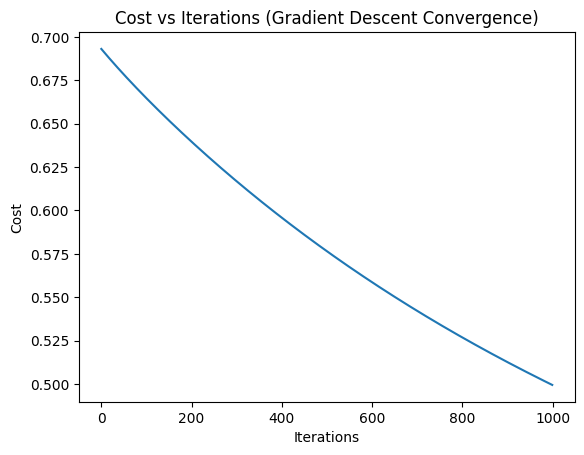

In [37]:
# =========================
# Cost vs Iterations (Convergence Proof)
# =========================

# =========================
# Initialization
# =========================

m, n = X_scaled.shape
w = np.zeros(n)
b = 0.0

learning_rate = 0.01
iterations = 1000

cost_history = []




# =========================
# Gradient Descent Loop
# =========================

for i in range(iterations):
    
    # Forward propagation
    y_pred = predict_proba(X_scaled.values, w, b)
    
    # Compute cost
    cost = compute_cost(y.values, y_pred)
    cost_history.append(cost)
    
    # Compute gradients
    dw, db = compute_gradients(X_scaled.values, y.values, y_pred)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db



# =========================
# Learning Curve Plot
# =========================

plt.figure()
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Gradient Descent Convergence)")
plt.show()
# The plot shows a decreasing trend in cost over iterations,
# indicating that the model is learning and converging towards optimal parameters.


In [38]:
keep_me_in_loop = '''
• Initialized model parameters and learning rate.
• Ran Gradient Descent iteratively to update weights and bias.
• Recorded the cost value at each iteration.
• Plotted cost versus iterations to verify convergence.
• The decreasing cost curve confirms correct optimization behavior.
'''


In [39]:
code_explained_each_and_everyline = '''
Here,
1. Initialization:
 - We first determine the number of samples (m) and features (n) from the scaled input feature matrix X_scaled.
 - m, n = X_scaled.shape    
 - This gives us the dimensions of our dataset, where m is the number of data points and n is the number of features.
 - We initialize the weight vector w with zeros of length n (one weight per feature).
 - w = np.zeros(n)
 - We initialize the bias term b to 0.0.
 - b = 0.0
2. We set the learning rate and number of iterations for Gradient Descent.
 - learning_rate = 0.01
 - iterations = 1000
 - The learning rate controls how big of a step we take during each update, and the number of iterations determines how many times we will update our parameters.
3. We create an empty list to store the cost at each iteration.
 - cost_history = []
 - This will help us track how the cost changes over time as we train the model.
4. Gradient Descent Loop:
 - for i in range(iterations):
 - This loop will run for the specified number of iterations to update our model parameters.
   a. Forward Propagation:
    - y_pred = predict_proba(X_scaled.values, w, b)
    - We compute the predicted probabilities using the current weights and bias.
   b. Compute Cost:
    - cost = compute_cost(y.values, y_pred)
    - We calculate the Binary Cross Entropy cost using the true labels and predicted probabilities.
    - cost_history.append(cost)
    - We append the computed cost to our cost history list for later analysis.
   c. Compute Gradients:
    - dw, db = compute_gradients(X_scaled.values, y.values, y_pred)
    - We calculate the gradients of the cost function with respect to weights and bias.
   d. Update Parameters:
    - w -= learning_rate * dw
    - b -= learning_rate * db
    - We update the weights and bias by moving in the direction opposite to the gradients, scaled by the learning rate.
5. Learning Curve Plot:
 - plt.figure()
 - plt.plot(cost_history)
 - plt.xlabel("Iterations")
'''